# AMOCarray demo

The purpose of this notebook is to demonstrate the functionality of `AMOCarray`.

The demo is organised to show

- Step 1: Loading and plotting a sample dataset

- Step 2: Exploring the dataset attributes and variables.

Note that when you submit a pull request, you should `clear all outputs` from your python notebook for a cleaner merge.


In [1]:
import pathlib
import sys

script_dir = pathlib.Path().parent.absolute()
parent_dir = script_dir.parents[0]
sys.path.append(str(parent_dir))

import importlib

import xarray as xr
import os
from amocarray import readers, plotters, standardise, utilities

In [2]:
# Specify the path for writing datafiles
data_path = os.path.join(parent_dir, "data")

### Load RAPID 26°N

In [3]:
# Load data from data/moc_transports (Quick start)
ds_rapid = readers.load_sample_dataset()
ds_rapid = standardise.standardise_rapid(ds_rapid, ds_rapid.attrs["source_file"])

# Load data from data/moc_transports (Full dataset)
datasetsRAPID = readers.load_dataset("rapid", transport_only=True)
standardRAPID = [
    standardise.standardise_rapid(ds, ds.attrs["source_file"]) for ds in datasetsRAPID
]



Summary for array 'rapid':
Total datasets loaded: 1

Dataset 1:
  Source file: moc_transports.nc
  Dimensions:
    - time: 13779
  Variables:
    - t_therm10: shape (13779,)
    - t_aiw10: shape (13779,)
    - t_ud10: shape (13779,)
    - t_ld10: shape (13779,)
    - t_bw10: shape (13779,)
    - t_gs10: shape (13779,)
    - t_ek10: shape (13779,)
    - t_umo10: shape (13779,)
    - moc_mar_hc10: shape (13779,)

Summary for array 'rapid':
Total datasets loaded: 1

Dataset 1:
  Source file: moc_transports.nc
  Dimensions:
    - time: 13779
  Variables:
    - t_therm10: shape (13779,)
    - t_aiw10: shape (13779,)
    - t_ud10: shape (13779,)
    - t_ld10: shape (13779,)
    - t_bw10: shape (13779,)
    - t_gs10: shape (13779,)
    - t_ek10: shape (13779,)
    - t_umo10: shape (13779,)
    - moc_mar_hc10: shape (13779,)



(<Figure size 1000x300 with 1 Axes>,
 <Axes: title={'center': 'RAPID 26°N'}, xlabel='Time', ylabel='Transport [Sv]'>)

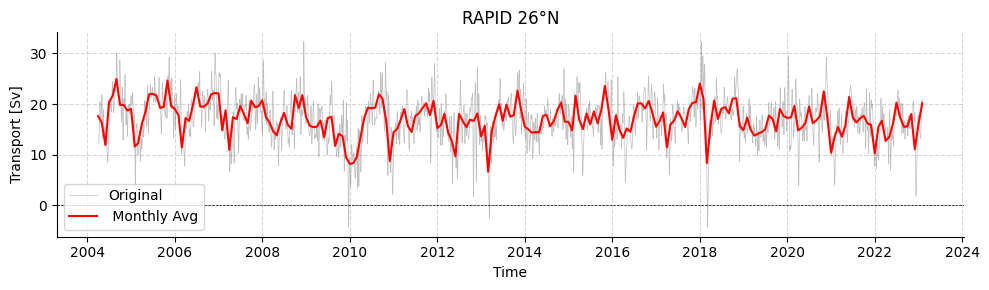

In [4]:
# Plot RAPID timeseries

plotters.plot_amoc_timeseries(
    data=[standardRAPID[0]],
    varnames=["moc_mar_hc10"],
    labels=[""],
    resample_monthly=True,
    plot_raw=True,
    title="RAPID 26°N"
)

### Load MOVE 16°N

In [5]:
datasetsMOVE = readers.load_dataset("move")
standardMOVE = [
    standardise.standardise_move(ds, ds.attrs["source_file"]) for ds in datasetsMOVE
]

Summary for array 'move':
Total datasets loaded: 1

Dataset 1:
  Source file: OS_MOVE_20000206-20221014_DPR_VOLUMETRANSPORT.nc
  Time coverage: 2000-02-06 to 2022-10-14
  Dimensions:
    - TIME: 4164
    - NVERT: 6
  Variables:
    - TRANSPORT_TOTAL: shape (4164,)
    - transport_component_internal: shape (4164,)
    - transport_component_internal_offset: shape (4164,)
    - transport_component_boundary: shape (4164,)
    - location_geometry: shape ()
    - location_vertices_latitude: shape (6,)
    - location_vertices_longitude: shape (6,)
    - location_vertices_vertical: shape (6,)



(<Figure size 1000x300 with 1 Axes>,
 <Axes: title={'center': 'MOVE 16°N - NADW Transport'}, xlabel='Time', ylabel='ocean_volume_transport_across_line [Sverdrup]'>)

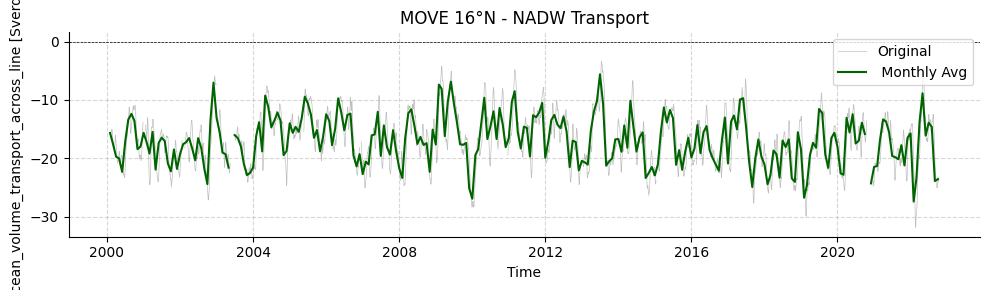

In [6]:
# Plot MOVE timeseries

plotters.plot_amoc_timeseries(
    data=[standardMOVE[0]],
    varnames=["TRANSPORT_TOTAL"],
    labels=[""],
    colors=["darkgreen"],
    resample_monthly=True,
    plot_raw=True,
    title="MOVE 16°N - NADW Transport"
)

### Load OSNAP

In [7]:
datasetsOSNAP = readers.load_dataset("osnap", transport_only = True)
standardOSNAP = [
    standardise.standardise_osnap(ds, ds.attrs["source_file"]) for ds in datasetsOSNAP
]


Summary for array 'osnap':
Total datasets loaded: 1

Dataset 1:
  Source file: OSNAP_MOC_MHT_MFT_TimeSeries_201408_202006_2023.nc
  Time coverage: 2014-08-01 to 2020-06-01
  Dimensions:
    - TIME: 71
  Variables:
    - MOC_ALL: shape (71,)
    - MOC_ALL_ERR: shape (71,)
    - MOC_EAST: shape (71,)
    - MOC_EAST_ERR: shape (71,)
    - MOC_WEST: shape (71,)
    - MOC_WEST_ERR: shape (71,)
    - MHT_ALL: shape (71,)
    - MHT_ALL_ERR: shape (71,)
    - MHT_EAST: shape (71,)
    - MHT_EAST_ERR: shape (71,)
    - MHT_WEST: shape (71,)
    - MHT_WEST_ERR: shape (71,)
    - MFT_ALL: shape (71,)
    - MFT_ALL_ERR: shape (71,)
    - MFT_EAST: shape (71,)
    - MFT_EAST_ERR: shape (71,)
    - MFT_WEST: shape (71,)
    - MFT_WEST_ERR: shape (71,)



(<Figure size 1000x300 with 1 Axes>,
 <Axes: title={'center': 'OSNAP'}, xlabel='Time', ylabel='Transport_anomaly [Sv]'>)

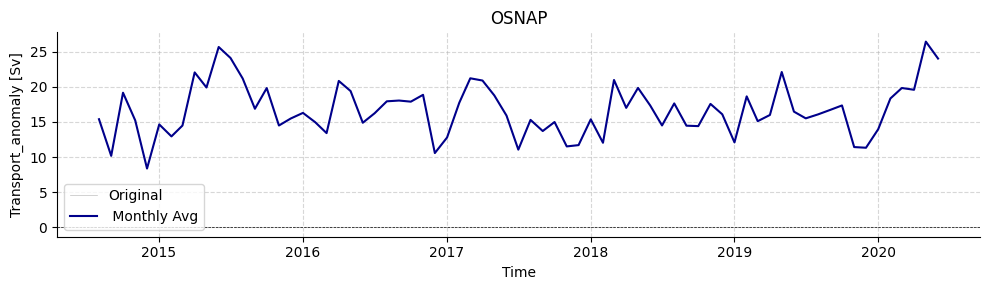

In [8]:
# Plot OSNAP timeseries

plotters.plot_amoc_timeseries(
    data=[standardOSNAP[0]],
    varnames=["MOC_ALL"],
    labels=[""],
    colors=["darkblue"],
    resample_monthly=True,
    plot_raw=True,
    title="OSNAP"
)

### Load SAMBA 34.5°S

In [9]:
datasetsSAMBA = readers.load_dataset("SAMBA")
standardSAMBA = [
    standardise.standardise_samba(ds, ds.attrs["source_file"]) for ds in datasetsSAMBA
]

Summary for array 'SAMBA':
Total datasets loaded: 2

Dataset 1:
  Source file: Upper_Abyssal_Transport_Anomalies.txt
  Time coverage: 2013-09-12 to 2017-07-16
  Dimensions:
    - TIME: 1404
  Variables:
    - Upper-cell volume transport anomaly (relative to record-length average of 17.3 Sv): shape (1404,)
    - Abyssal-cell volume transport anomaly (relative to record-length average of 7.8 Sv): shape (1404,)

Dataset 2:
  Source file: MOC_TotalAnomaly_and_constituents.asc
  Time coverage: 2009-03-19 to 2017-04-29
  Dimensions:
    - TIME: 2964
  Variables:
    - Total MOC anomaly (relative to record-length average of 14.7 Sv): shape (2964,)
    - Relative (density gradient) contribution to the MOC anomaly: shape (2964,)
    - Reference (bottom pressure gradient) contribution to the MOC anomaly: shape (2964,)
    - Ekman (wind) contribution to the MOC anomaly: shape (2964,)
    - Western density contribution to the MOC anomaly: shape (2964,)
    - Eastern density contribution to the MOC

(<Figure size 1000x300 with 1 Axes>,
 <Axes: title={'center': 'SAMBA 34.5°S'}, xlabel='Time', ylabel='Transport_anomaly [Sv]'>)

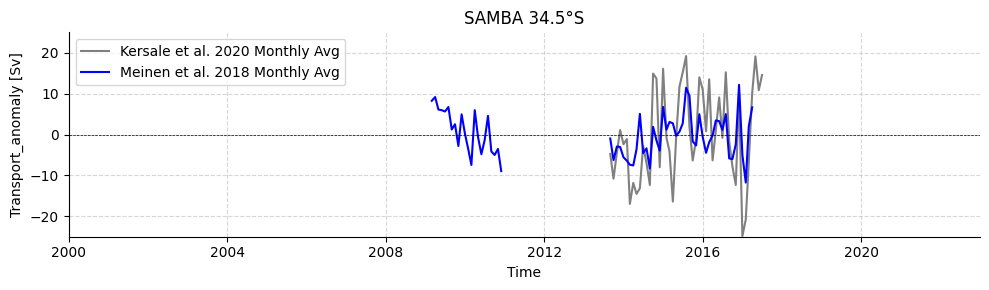

In [10]:
# Plot SAMBA timeseries

plotters.plot_amoc_timeseries(
    data=[standardSAMBA[0], standardSAMBA[1]],
    varnames=["UPPER_TRANSPORT", "MOC"],
    labels=["Kersale et al. 2020", "Meinen et al. 2018"],
    colors=["grey", "blue"],
    title="SAMBA 34.5°S",
    time_limits=("2000-01-01", "2022-12-31"),
    ylim=(-25, 25),
    resample_monthly=True,
    plot_raw=False # Raw data is a little spiky
)

###  Load FW2015

In [11]:
datasetsfw2015 = readers.load_dataset("fw2015")
standardfw2015 = [
    standardise.standardise_fw2015(ds, ds.attrs["source_file"]) for ds in datasetsfw2015
]
plotters.show_variables(standardfw2015[0])

Summary for array 'fw2015':
Total datasets loaded: 1

Dataset 1:
  Source file: MOCproxy_for_figshare_v1.mat
  Time coverage: 1993-01-15 to 2014-12-15
  Dimensions:
    - TIME: 264
  Variables:
    - MOC_PROXY: shape (264,)
    - EK: shape (264,)
    - H1UMO: shape (264,)
    - GS: shape (264,)
    - UMO_PROXY: shape (264,)
    - MOC_GRID: shape (264,)
    - EK_GRID: shape (264,)
    - GS_GRID: shape (264,)
    - LNADW_GRID: shape (264,)
    - UMO_GRID: shape (264,)
    - UNADW_GRID: shape (264,)

information is based on xarray Dataset


,dims,units,comment,standard_name,dtype
name,,,,,
EK,TIME,,,,float64
EK_GRID,TIME,,,,float64
GS,TIME,,,,float64
GS_GRID,TIME,,,,float64
H1UMO,TIME,,,,float64
LNADW_GRID,TIME,,,,float64
MOC_GRID,TIME,,,,float64
MOC_PROXY,TIME,,,,float64
TIME,TIME,,,,datetime64[ns]


(<Figure size 1000x300 with 1 Axes>,
 <Axes: title={'center': 'FW2015'}, xlabel='Time', ylabel='Transport [Sv]'>)

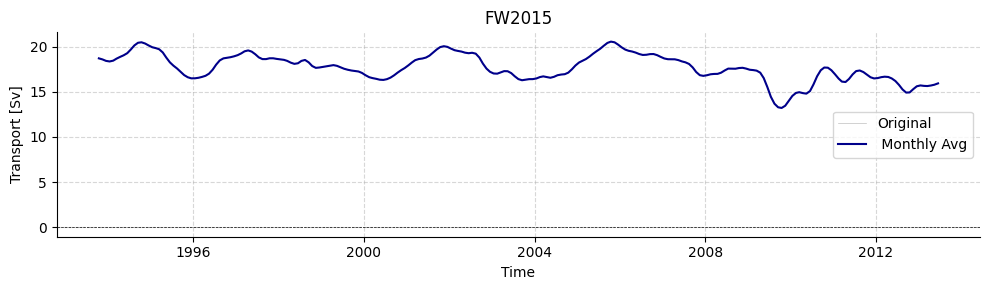

In [12]:
# Plot timeseries

plotters.plot_amoc_timeseries(
    data=[standardfw2015[0]],
    varnames=["MOC_PROXY"],
    labels=[""],
    colors=["darkblue"],
    resample_monthly=True,
    plot_raw=True,
    title="FW2015"
)

### LOAD MOCHA 26.5°N

In [13]:
datasetsMOCHA = readers.load_dataset("mocha")
standardMOCHA = [
    standardise.standardise_mocha(ds, ds.attrs["source_file"]) for ds in datasetsMOCHA
]

plotters.show_variables(standardMOCHA[0])

Summary for array 'mocha':
Total datasets loaded: 1

Dataset 1:
  Source file: mocha_mht_data_ERA5_v2020.nc
  Dimensions:
    - time: 12202
    - depth: 307
  Variables:
    - Q_eddy: shape (12202,)
    - Q_ek: shape (12202,)
    - Q_fc: shape (12202,)
    - Q_gyre: shape (12202,)
    - Q_int: shape (12202,)
    - Q_mo: shape (12202,)
    - Q_ot: shape (12202,)
    - Q_sum: shape (12202,)
    - Q_wedge: shape (12202,)
    - T_basin: shape (12202, 307)
    - T_basin_mean: shape (307,)
    - T_fc_fwt: shape (12202,)
    - V_basin: shape (12202, 307)
    - V_basin_mean: shape (307,)
    - V_fc: shape (12202, 307)
    - V_fc_mean: shape (307,)
    - trans_ek: shape (12202,)
    - trans_fc: shape (12202,)
    - maxmoc: shape (12202,)
    - moc: shape (12202, 307)
    - z: shape (307,)
    - julian_day: shape (12202,)
    - year: shape (12202,)
    - month: shape (12202,)
    - day: shape (12202,)
    - hour: shape (12202,)

information is based on xarray Dataset


/Users/eddifying/Cloudfree/github/amocarray/amocarray/read_mocha.py:145: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  ds = xr.open_dataset(nc_path)
/Users/eddifying/Cloudfree/github/amocarray/amocarray/plotters.py:114: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  "dtype": str(var.dtype) if isinstance(data, str) else str(var.data.dtype),


,dims,units,comment,standard_name,dtype
name,,,,,
Q_eddy,TIME,W,"derived from an objective analysis of interior ARGO T/S data merged with the mooring T/S data from moorings, and smoothly merged into the EN4 climatology along 26.5°N below 2000m. Q_eddy is not dependent on the temperature reference",Heat Transport,float64
Q_ek,TIME,W,,Heat Transport,float64
Q_fc,TIME,W,,Heat Transport,float64
Q_gyre,TIME,W,"as classically defined (e.g. see Johns et al., 2011).",Heat Transport,float64
Q_int,TIME,W,This only represents the contribution by the zonal mean v and T,Heat Transport,float64
Q_mo,TIME,W,(Q_int + Q_wedge + Q_eddy),Heat Transport,float64
Q_ot,TIME,W,"as classically defined (e.g. see Johns et al., 2011).",Heat Transport,float64
Q_sum,TIME,W,,Heat Transport,float64
Q_wedge,TIME,W,,Heat Transport,float64


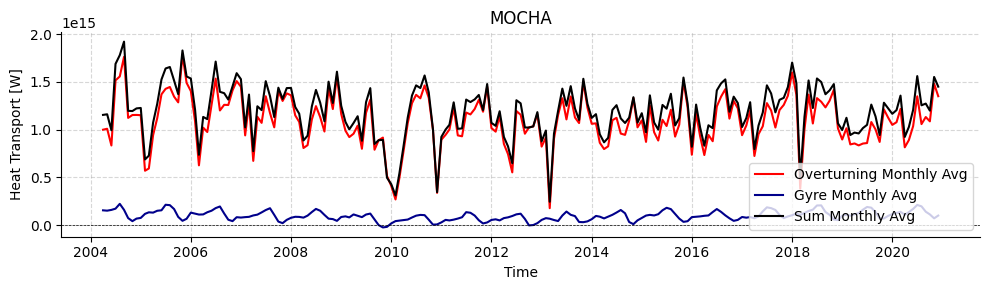

In [14]:
# Plot timeseries

fig, ax = plotters.plot_amoc_timeseries(
    data=[standardMOCHA[0],standardMOCHA[0],standardMOCHA[0]],
    varnames=["Q_ot","Q_gyre","Q_sum"],
    labels=["Overturning","Gyre","Sum"],
    colors=["red","darkblue","black"],
    resample_monthly=True,
    plot_raw=False,
    title="MOCHA"
)
ax.legend(loc="lower right")


### LOAD 41°N

In [15]:
datasets41n = readers.load_dataset("41n", transport_only=False)
standard41n = [
    standardise.standardise_41n(ds, ds.attrs["source_file"]) for ds in datasets41n
]

Summary for array '41n':
Total datasets loaded: 3

Dataset 1:
  Source file: hobbs_willis_amoc41N_tseries.txt
  Time coverage: 2002-02-15 to 2024-12-16
  Dimensions:
    - TIME: 275
  Variables:
    - Ekman Volume Transport (Sverdrups): shape (275,)
    - Northward Geostrophic Transport (Sverdrups): shape (275,)
    - Meridional Overturning Volume Transport (Sverdrups): shape (275,)
    - Meridional Overturning Heat Transport (PetaWatts): shape (275,)

Dataset 2:
  Source file: ARGO_heat_transport_write.ncl
  Dimensions:
    - depth: 201
    - lon: 320
    - time: 276
    - lat: 4
  Variables:
    - Vek: shape (276, 4)
    - trans: shape (276, 4, 320, 201)
    - moc: shape (276, 4)

Dataset 3:
  Source file: ARGO_heat_transport_write.ncl
  Dimensions:
    - depth: 201
    - lon: 320
    - lat: 4
    - time: 276
    - Hpar: 4
  Variables:
    - Qnet: shape (276, 4, 4)
    - Qek: shape (276, 4)
    - Q: shape (276, 4, 320, 201)



(<Figure size 1000x300 with 1 Axes>,
 <Axes: title={'center': '41N'}, xlabel='Time', ylabel='Transport [Sv]'>)

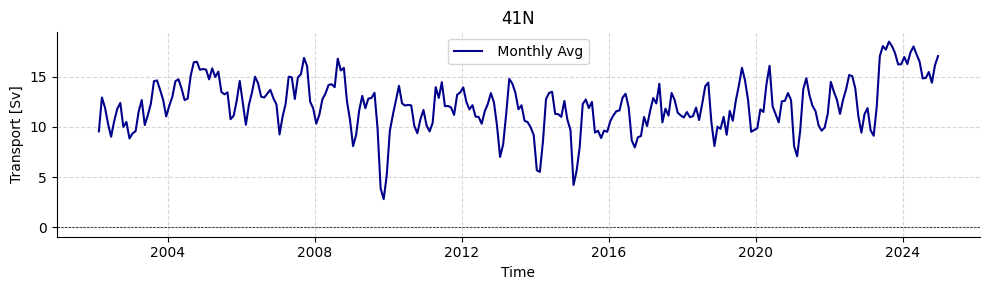

In [16]:
plotters.plot_amoc_timeseries(
    data=[standard41n[0]],
    varnames=["MOT"],
    labels=[""],
    resample_monthly=True,
    plot_raw=False,
    colors=["darkblue"],
    title="41N"
)

### LOAD DSO

In [17]:
datasetsDSO = readers.load_dataset("DSO", transport_only=False)
standardDSO = [
    standardise.standardise_dso(ds, ds.attrs["source_file"]) for ds in datasetsDSO
]

Summary for array 'DSO':
Total datasets loaded: 1

Dataset 1:
  Source file: DSO_transport_hourly_1996_2021.nc
  Time coverage: 1996-05-01 to 2021-08-07
  Dimensions:
    - TIME: 221514
    - LATITUDE: 1
    - LONGITUDE: 1
    - DEPTH: 1
  Variables:
    - DSO_tr: shape (221514, 1)



(<Figure size 1000x300 with 1 Axes>,
 <Axes: title={'center': 'DSO'}, xlabel='Time', ylabel='Transport [Sv]'>)

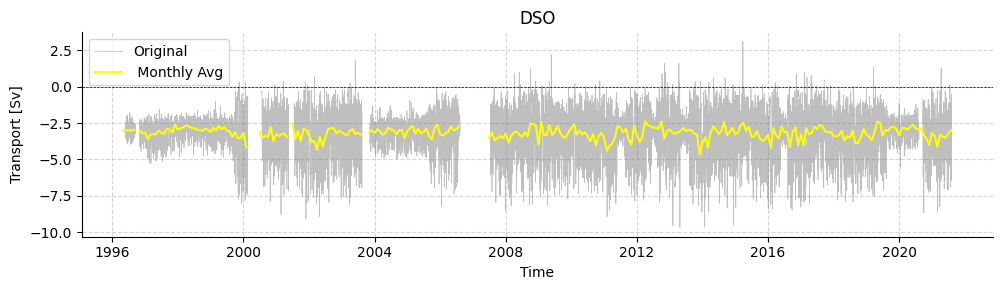

In [18]:
plotters.plot_amoc_timeseries(
    data=[standardDSO[0]],
    varnames=["DSO"],
    labels=[""],
    resample_monthly=True,
    plot_raw=True,
    colors=["yellow"],
    title="DSO"
)

### Monthly Anomalies Overview

(<Figure size 1000x1600 with 7 Axes>,
 array([<Axes: title={'center': 'DS Overflow Transport'}, ylabel='Transport [Sv]'>,
        <Axes: title={'center': 'OSNAP'}, ylabel='Transport [Sv]'>,
        <Axes: title={'center': '41°N'}, ylabel='Transport [Sv]'>,
        <Axes: title={'center': 'RAPID 26°N'}, ylabel='Transport [Sv]'>,
        <Axes: title={'center': 'FW2015'}, ylabel='Transport [Sv]'>,
        <Axes: title={'center': 'MOVE 16°N'}, ylabel='Transport [Sv]'>,
        <Axes: title={'center': 'SAMBA 34.5°S'}, xlabel='Time', ylabel='Transport [Sv]'>],
       dtype=object))

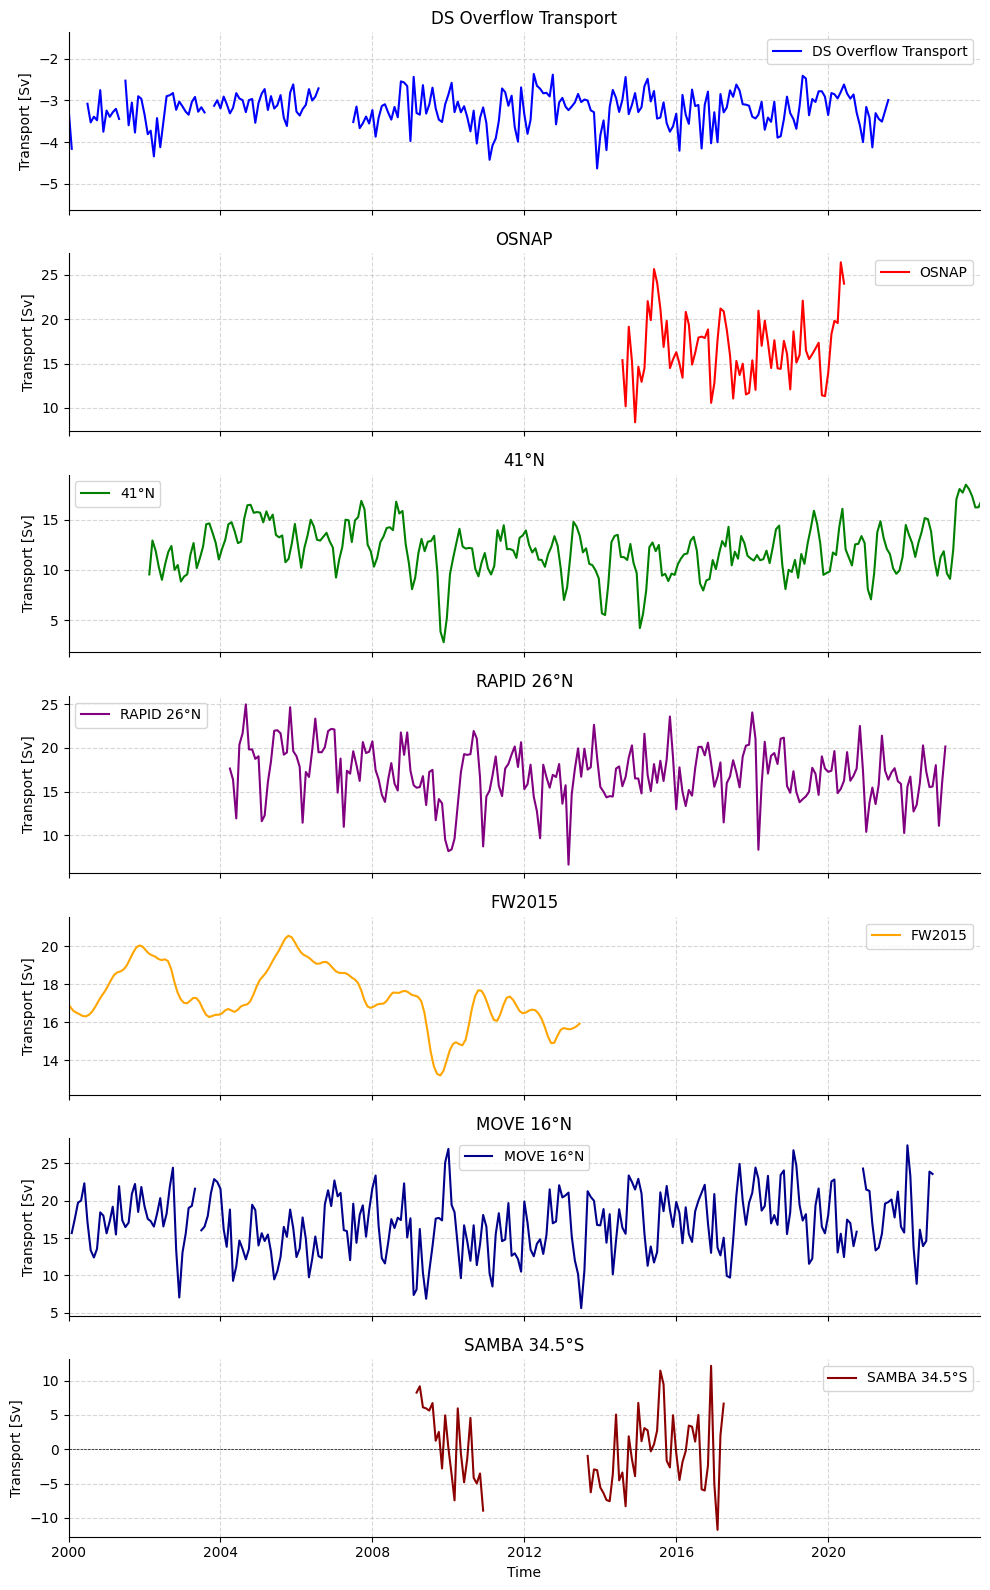

In [19]:
plotters.plot_monthly_anomalies(
    osnap_data=standardOSNAP[0]["MOC_ALL"],
    rapid_data=standardRAPID[0]["moc_mar_hc10"],
    move_data=-standardMOVE[0]["TRANSPORT_TOTAL"],
    samba_data=standardSAMBA[1]["MOC"],
    fw2015_data=standardfw2015[0]["MOC_PROXY"],
    fortyone_data = standard41n[0]["MOT"],
    dso_data = standardDSO[0]["DSO"],
    osnap_label="OSNAP",
    rapid_label="RAPID 26°N",
    move_label="MOVE 16°N",
    samba_label="SAMBA 34.5°S",
    fw2015_label="FW2015",
    fortyone_label = "41°N",
    dso_label = "DS Overflow Transport"
)

/var/folders/t1/z5bp59k95119nw35yqv699t40000gn/T/ipykernel_22227/108944074.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


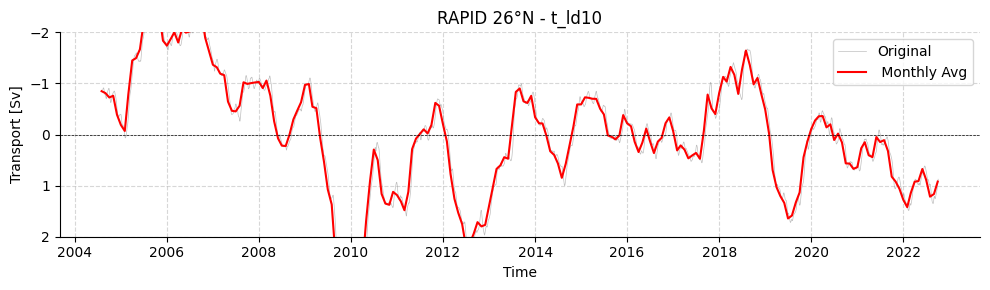

In [20]:
import matplotlib.pyplot as plt



#tmp = standardRAPID[0]["t_ud10"].rolling(TIME = 6, center = True).mean()
clim = standardRAPID[0].groupby("TIME.month").mean("TIME")
tmp = standardRAPID[0].groupby("TIME.month") - clim
filtRAPID = tmp.rolling(TIME = 500, center = True).mean()

fig,ax = plotters.plot_amoc_timeseries(
    data=[filtRAPID],
    varnames=["t_ld10"],
    labels=[""],
    resample_monthly=True,
    plot_raw=True,
    title="RAPID 26°N - t_ld10"
)
ax.set_ylim(2, -2)

fig.show()
